## Mustafa Habibi

### Task M9 T01

### Exercise 1
Take any English text you want, and calculate the frequency of its words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from IPython.display import display
import scipy.stats as stats
import re
from unidecode import unidecode
from textblob import TextBlob
from collections import Counter
sns.set_style('whitegrid')
sns.set_palette('flare')

In [2]:
def normalize_text(text):
    # Text normalization steps
    pasos = [
        (r'<[^<]+?>', ''),
        (r'http\S+', ''),
        (r'[^\w\s]', ''),
        (r'\d+', ''),
        (r'\n', ' '),
        (None, lambda x: x.lower()),
        (None, lambda x: unidecode(x))
    ]

    for patro, substitucio in pasos:
        if patro:
            text = re.sub(patro, substitucio, text)
        elif substitucio:
            text = substitucio(text)

    return text

# The text
text = """ While anxiety symptoms vary widely, odds are good that at some point you've experienced occasional physical and emotional distress signals such as panicky breathing, your heart pounding in your chest, trouble sleeping, feelings of dread, or even loops of worry. That's normal.

By itself, anxiety isn't a problem. It anchors the protective biological response to danger that boosts heartbeat and breathing, pumping oxygenated blood to your muscles as your body prepares to fight or flee. A dollop of healthy anxiety can persuade you to get to work on time, push you to study hard for an exam, or discourage you from wandering dark streets alone.

"Experiencing anxiety is normal," says Dr. Gene Beresin, executive director of the Clay Center for Healthy Young Minds at Massachusetts General Hospital. "A certain amount of anxiety can even be helpful. The problem is that sometimes the systems underlying our anxiety responses get dysregulated, so that we overreact or react to the wrong situations."

What is an anxiety disorder?
Severity of symptoms and a person's ability to cope separate everyday worries or anxious moments from anxiety disorders. National surveys estimate nearly one in five Americans over 18, and one in three teens ages 13 to 18, had an anxiety disorder during the past year.

If anxiety is persistent, excessive, or routinely triggered by situations that aren't an actual threat, tell your doctor, who can discuss treatment options or refer you to an experienced mental health professional.

What kind of anxiety disorder do you have?
As with every health issue, an accurate diagnosis is essential. A few common anxiety disorders include:

Generalized anxiety disorder: A pattern of excessive worry about a variety of issues on most days for at least six months, often accompanied by physical symptoms, such as muscle tension, a hammering heart, or dizziness.
Social anxiety disorder: Feeling significant anxiety in social situations or when called on to perform in front of others, such as in public speaking.
Phobias: A particular animal, insect, object, or situation causes substantial anxiety.
Panic disorder: Panic attacks are sudden, intense episodes of heart-banging fear, breathlessness, and dread. "It's the feeling you'd have if you just missed being hit by a Mack truck — but for people with panic disorder there is no Mack truck," says Dr. Beresin.
The costs of anxiety
Constant anxiety levies a toll on health. For example, anxiety increases levels of the stress hormone cortisol, raising blood pressure, which contributes over time to heart problems, stroke, kidney disease, and sexual dysfunction. And a 2017 Lancet study using brain scans measured activity in an area called the amygdala, which mounts split-second responses to danger and encodes memories of frightening events. Greater activity in the amygdala correlated with higher risk for heart disease and stroke, possibly, the researchers speculated, by triggering immune system production of extra white cells to fight perceived threats. In people struggling with emotional stress, this might drive inflammation and plaque formation that leads to heart attacks and strokes.

Quality of life suffers, too. Intrusive thoughts, dread of panic attacks, intense self-consciousness and fear of rejection, and other hallmarks of anxiety disorders compel people to avoid anxiety-provoking situations. This interferes with relationships, work, school, and activities as people isolate themselves, turn down opportunities, and forgo possible joys in life.

There are effective treatments for anxiety
Treatment is tailored to the diagnosis. Effective options include:

Lifestyle changes, such as skipping caffeine, exercising regularly, and avoiding medicines or substances that might cause anxiety symptoms.
Mind-body approaches, such as deep breathing, meditation, mindfulness, and techniques to ease muscle tension and promote calm.
Psychotherapy, such as cognitive behavioral therapy (CBT) and exposure therapy. CBT teaches people to challenge and reframe distorted or unhelpful anxious thinking, because thoughts influence feelings and actions. Exposure therapy helps people tolerate and calm anxiety by gradually exposing a person to feared situations or objects under guidance from a therapist.
Medicines, such as short-acting drugs called benzodiazepines, which are taken as needed when anxiety spikes. Low doses of some antidepressants, particularly selective serotonin reuptake inhibitors (SSRIs), help relieve anxiety when taken daily.
Often, a combination of approaches is best. Relieving anxiety with medicine while using CBT or exposure therapy to strengthen coping skills and help retrain the brain can do much to make anxiety manageable.
"""

# Normalize the text
normalized_text = normalize_text(text)

# Tokenize the text into words
words = normalized_text.split()

# Count the frequency of each word
word_counts = Counter(words)
print("Normalized Text:")
print(normalized_text)
# Print the word frequencies
print("Word Frequencies:")
for word, count in word_counts.items():
    print(f"{word}: {count}")


Normalized Text:
 while anxiety symptoms vary widely odds are good that at some point youve experienced occasional physical and emotional distress signals such as panicky breathing your heart pounding in your chest trouble sleeping feelings of dread or even loops of worry thats normal  by itself anxiety isnt a problem it anchors the protective biological response to danger that boosts heartbeat and breathing pumping oxygenated blood to your muscles as your body prepares to fight or flee a dollop of healthy anxiety can persuade you to get to work on time push you to study hard for an exam or discourage you from wandering dark streets alone  experiencing anxiety is normal says dr gene beresin executive director of the clay center for healthy young minds at massachusetts general hospital a certain amount of anxiety can even be helpful the problem is that sometimes the systems underlying our anxiety responses get dysregulated so that we overreact or react to the wrong situations  what is a

In [3]:
# Tokenize the text and remove non-alphabetic tokens
tokens = re.findall(r'\b\w+\b', text.lower())

# Filter out non-alphabetic tokens
tokens_cleaned = [word for word in tokens if word.isalpha()]

# Print the cleaned tokens
print(tokens_cleaned)

['while', 'anxiety', 'symptoms', 'vary', 'widely', 'odds', 'are', 'good', 'that', 'at', 'some', 'point', 'you', 've', 'experienced', 'occasional', 'physical', 'and', 'emotional', 'distress', 'signals', 'such', 'as', 'panicky', 'breathing', 'your', 'heart', 'pounding', 'in', 'your', 'chest', 'trouble', 'sleeping', 'feelings', 'of', 'dread', 'or', 'even', 'loops', 'of', 'worry', 'that', 's', 'normal', 'by', 'itself', 'anxiety', 'isn', 't', 'a', 'problem', 'it', 'anchors', 'the', 'protective', 'biological', 'response', 'to', 'danger', 'that', 'boosts', 'heartbeat', 'and', 'breathing', 'pumping', 'oxygenated', 'blood', 'to', 'your', 'muscles', 'as', 'your', 'body', 'prepares', 'to', 'fight', 'or', 'flee', 'a', 'dollop', 'of', 'healthy', 'anxiety', 'can', 'persuade', 'you', 'to', 'get', 'to', 'work', 'on', 'time', 'push', 'you', 'to', 'study', 'hard', 'for', 'an', 'exam', 'or', 'discourage', 'you', 'from', 'wandering', 'dark', 'streets', 'alone', 'experiencing', 'anxiety', 'is', 'normal', '

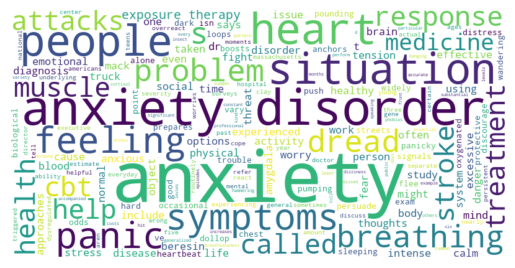

In [4]:
from wordcloud import WordCloud

# Convert the list of tokens into a space-separated string
text = ' '.join(tokens)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the Word Cloud from the text
wordcloud.generate(text)

# Display the Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
from collections import Counter

# Count the frequency of each token
word_counts = Counter(tokens_cleaned)

# Create a DataFrame to display the cleaned tokens and their frequencies in a table
df = pd.DataFrame({'Cleaned Tokens': list(word_counts.keys()), 'Frequency': list(word_counts.values())})

# Print the DataFrame
print(df)


    Cleaned Tokens  Frequency
0            while          2
1          anxiety         28
2         symptoms          4
3             vary          1
4           widely          1
..             ...        ...
383         skills          1
384        retrain          1
385           much          1
386           make          1
387     manageable          1

[388 rows x 2 columns]


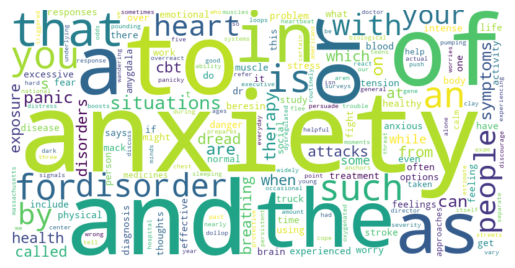

In [6]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

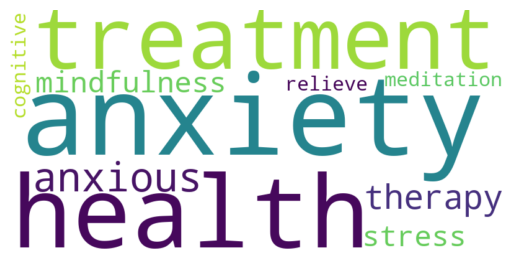

In [7]:
from wordcloud import WordCloud

# Sample frequency distribution (replace this with your actual frequency distribution)
freq_dist = {
    'anxiety': 10,
    'health': 8,
    'treatment': 6,
    'anxious': 5,
    'therapy': 4,
    'mindfulness': 3,
    'stress': 3,
    'meditation': 2,
    'relieve': 2,
    'cognitive': 2,
}

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(freq_dist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Exercise 2
Remove the stopwords and perform stemming on your dataset.

In [8]:
# Get a list of English stopwords
stop_words = set(stopwords.words('english'))


# Filter out stopwords
filtered_tokens = [word for word in tokens_cleaned if word not in stop_words]

# Create a DataFrame to display the cleaned tokens and their frequencies in a table
df = pd.DataFrame({'Cleaned Tokens': filtered_tokens})

# Print the DataFrame
print(df)


    Cleaned Tokens
0          anxiety
1         symptoms
2             vary
3           widely
4             odds
..             ...
448          brain
449           much
450           make
451        anxiety
452     manageable

[453 rows x 1 columns]


In [9]:
from nltk import FreqDist


# Create an NLTK FreqDist object to count the frequency of each token
freq_dist = FreqDist(filtered_tokens)

# Create a DataFrame to display the cleaned tokens and their frequencies in a table
df = pd.DataFrame({'Cleaned Tokens': filtered_tokens})

# Add a frequency column
df['Frequency'] = df['Cleaned Tokens'].map(freq_dist)

# Print the DataFrame
print(df)


    Cleaned Tokens  Frequency
0          anxiety         28
1         symptoms          4
2             vary          1
3           widely          1
4             odds          1
..             ...        ...
448          brain          2
449           much          1
450           make          1
451        anxiety         28
452     manageable          1

[453 rows x 2 columns]


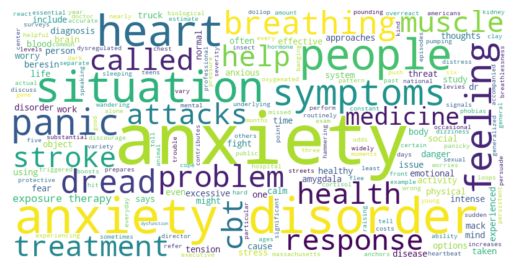

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_text(' '.join(filtered_tokens))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Stem each word in the list
stemmed_words = [stemmer.stem(word) for word in words]

# Print the stemmed words
print(stemmed_words)

['while', 'anxieti', 'symptom', 'vari', 'wide', 'odd', 'are', 'good', 'that', 'at', 'some', 'point', 'youv', 'experienc', 'occasion', 'physic', 'and', 'emot', 'distress', 'signal', 'such', 'as', 'panicki', 'breath', 'your', 'heart', 'pound', 'in', 'your', 'chest', 'troubl', 'sleep', 'feel', 'of', 'dread', 'or', 'even', 'loop', 'of', 'worri', 'that', 'normal', 'by', 'itself', 'anxieti', 'isnt', 'a', 'problem', 'it', 'anchor', 'the', 'protect', 'biolog', 'respons', 'to', 'danger', 'that', 'boost', 'heartbeat', 'and', 'breath', 'pump', 'oxygen', 'blood', 'to', 'your', 'muscl', 'as', 'your', 'bodi', 'prepar', 'to', 'fight', 'or', 'flee', 'a', 'dollop', 'of', 'healthi', 'anxieti', 'can', 'persuad', 'you', 'to', 'get', 'to', 'work', 'on', 'time', 'push', 'you', 'to', 'studi', 'hard', 'for', 'an', 'exam', 'or', 'discourag', 'you', 'from', 'wander', 'dark', 'street', 'alon', 'experienc', 'anxieti', 'is', 'normal', 'say', 'dr', 'gene', 'beresin', 'execut', 'director', 'of', 'the', 'clay', 'cent

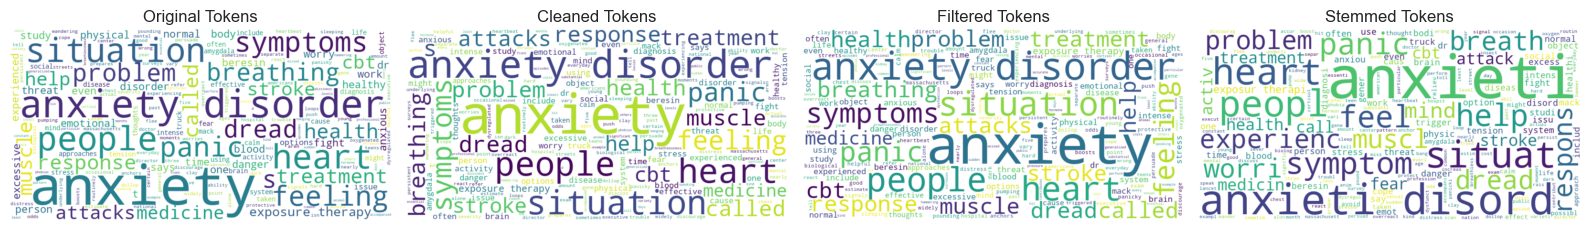

In [12]:
# Create the figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Create the Word Clouds
wordcloud1 = WordCloud(width=800, height=400, background_color='white')
wordcloud1.generate_from_text(' '.join(tokens))
axs[0].imshow(wordcloud1, interpolation='bilinear')
axs[0].set_title('Original Tokens')
axs[0].axis('off')

wordcloud2 = WordCloud(width=800, height=400, background_color='white')
wordcloud2.generate_from_text(' '.join(tokens_cleaned))
axs[1].imshow(wordcloud2, interpolation='bilinear')
axs[1].set_title('Cleaned Tokens')
axs[1].axis('off')

wordcloud3 = WordCloud(width=800, height=400, background_color='white')
wordcloud3.generate_from_text(' '.join(filtered_tokens))
axs[2].imshow(wordcloud3, interpolation='bilinear')
axs[2].set_title('Filtered Tokens')
axs[2].axis('off')

stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
wordcloud4 = WordCloud(width=800, height=400, background_color='white')
wordcloud4.generate_from_text(' '.join(stemmed_tokens))
axs[3].imshow(wordcloud4, interpolation='bilinear')
axs[3].set_title('Stemmed Tokens')
axs[3].axis('off')

# Show the figure
plt.tight_layout()
plt.show()


## Exercise 3
Perform sentiment analysis on your dataset.

In [13]:
from textblob import TextBlob

# Create a TextBlob object
blob = TextBlob(text)

# Analyze sentiment
sentiment_polarity = blob.sentiment.polarity
sentiment_subjectivity = blob.sentiment.subjectivity

# Print sentiment results
print("Sentiment Polarity:", sentiment_polarity)
print("Sentiment Subjectivity:", sentiment_subjectivity)



Sentiment Polarity: 0.07616536065903155
Sentiment Subjectivity: 0.4867884576745335


The sentiment analysis results you provided include two key metrics:

1. **Sentiment Polarity:** 0.0762
   - Sentiment polarity measures the sentiment's orientation or sentiment direction within the text.
   - A positive polarity value (greater than 0) suggests a positive sentiment, indicating that the text expresses positive feelings or opinions to some degree.
   - In this case, a polarity value of approximately 0.0762 suggests a slightly positive sentiment within the analyzed text. However, it's a relatively small positive sentiment.

2. **Sentiment Subjectivity:** 0.4868
   - Sentiment subjectivity measures the degree to which the text is subjective or objective in nature.
   - A subjectivity value close to 0 indicates a more objective and factual text, while a value close to 1 suggests a highly subjective and opinion-based text.
   - In this case, a subjectivity value of approximately 0.4868 indicates that the text has a moderate level of subjectivity. It means that while there are some subjective elements in the text, it also contains objective or factual content.

In summary, the sentiment analysis results suggest that the analyzed text has a slightly positive sentiment and a moderate level of subjectivity. However, it's important to note that these results provide an overall sentiment score for the entire text.

In [14]:
# # Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores(text)

# Analyze the sentiment of each sentence in your text
sentences = text.split('\n')
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    print("Sentence:", sentence.strip())
    print("Sentiment:", sentiment)
    print()
sentiment = sia.polarity_scores(sentence)
df_scores = pd.DataFrame(scores, index=[0])
df_scores

Sentence: while anxiety symptoms vary widely odds are good that at some point you ve experienced occasional physical and emotional distress signals such as panicky breathing your heart pounding in your chest trouble sleeping feelings of dread or even loops of worry that s normal by itself anxiety isn t a problem it anchors the protective biological response to danger that boosts heartbeat and breathing pumping oxygenated blood to your muscles as your body prepares to fight or flee a dollop of healthy anxiety can persuade you to get to work on time push you to study hard for an exam or discourage you from wandering dark streets alone experiencing anxiety is normal says dr gene beresin executive director of the clay center for healthy young minds at massachusetts general hospital a certain amount of anxiety can even be helpful the problem is that sometimes the systems underlying our anxiety responses get dysregulated so that we overreact or react to the wrong situations what is an anxiet

,neg,neu,pos,compound
0,0.247,0.656,0.097,-0.9986


The sentiment analysis results you provided include several sentiment-related metrics using a sentiment analysis tool like VADER (Valence Aware Dictionary and sEntiment Reasoner). Here's the breakdown of these metrics:

1. **Negative Sentiment (neg):** 0.247
   - The "neg" score represents the probability or intensity of negative sentiment within the text.
   - In this case, a neg score of 0.247 suggests a moderate level of negative sentiment within the analyzed text.

2. **Neutral Sentiment (neu):** 0.656
   - The "neu" score represents the probability or intensity of neutral sentiment within the text.
   - In this case, a neu score of 0.656 indicates that a significant portion of the text is classified as neutral, suggesting a balanced or non-emotional tone in those parts.

3. **Positive Sentiment (pos):** 0.097
   - The "pos" score represents the probability or intensity of positive sentiment within the text.
   - In this case, a pos score of 0.097 indicates a relatively low level of positive sentiment within the analyzed text.

4. **Compound Sentiment (compound):** -0.9986
   - The "compound" score is a single aggregated sentiment score that combines the scores for negative, neutral, and positive sentiments.
   - It provides an overall sentiment score for the entire text, where values closer to 1 represent highly positive sentiment, values closer to -1 represent highly negative sentiment, and values around 0 represent neutral sentiment.
   - In this case, a compound score of -0.9986 suggests a very strong negative sentiment within the analyzed text.

In summary, the sentiment analysis results indicate that the analyzed text contains a strong negative sentiment, as reflected by the low compound score. This means that the majority of the text expresses negative sentiment, with some portions being neutral and very few expressing positive sentiment.

In [15]:
# Define custom rules and their corresponding sentiment polarities
custom_rules = {
    "positive_words": ["good", "helpful", "normal", "persuade"],
    "negative_words": ["problem", "dysregulated", "overreact", "struggling"],
}

# Tokenize your text into sentences (you can use NLTK or spaCy)
sentences = text.split('\n')

# Analyze sentiment based on custom rules
for sentence in sentences:
    words = sentence.lower().split()
    sentiment_score = 0

    for word in words:
        if word in custom_rules["positive_words"]:
            sentiment_score += 1
        elif word in custom_rules["negative_words"]:
            sentiment_score -= 1

    # Classify sentiment based on the score
    if sentiment_score > 0:
        sentiment_label = "Positive"
    elif sentiment_score < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    print("Sentence:", sentence.strip())
    print("Sentiment:", sentiment_label)
    print()


Sentence: while anxiety symptoms vary widely odds are good that at some point you ve experienced occasional physical and emotional distress signals such as panicky breathing your heart pounding in your chest trouble sleeping feelings of dread or even loops of worry that s normal by itself anxiety isn t a problem it anchors the protective biological response to danger that boosts heartbeat and breathing pumping oxygenated blood to your muscles as your body prepares to fight or flee a dollop of healthy anxiety can persuade you to get to work on time push you to study hard for an exam or discourage you from wandering dark streets alone experiencing anxiety is normal says dr gene beresin executive director of the clay center for healthy young minds at massachusetts general hospital a certain amount of anxiety can even be helpful the problem is that sometimes the systems underlying our anxiety responses get dysregulated so that we overreact or react to the wrong situations what is an anxiet

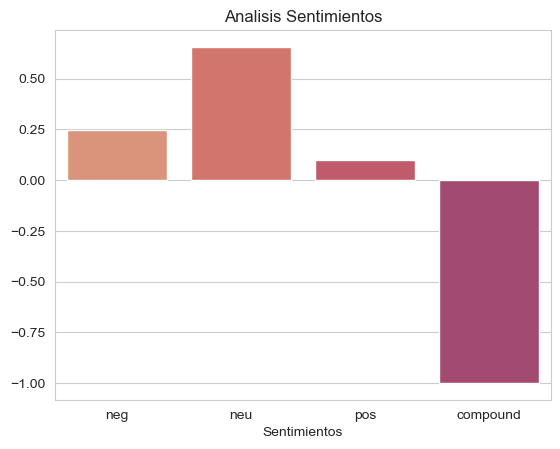

In [16]:
sns.barplot(df_scores)
plt.xlabel ('Sentimientos')
plt.title ('Analisis Sentimientos')
plt.show()
